# 750 MeV/u

In [42]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

OSError: JVM is already started

In [43]:
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [44]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [45]:
with open('spill_data_bxscint_2022_10_18_13h58m56s/spill_data_bxscint_2022_10_18_13h58m56s.p', 'rb') as f:
    data = pickle.load(f)

In [46]:
data[0][0]

datetime.datetime(2022, 10, 18, 13, 58, 58, 247436)

In [47]:
time_list = []
for i in range(len(data[0])):
    time_list.append(data[0][i].strftime("%Hh%Mm%Ss"))

In [48]:
data[1].keys()

dict_keys(['BXSCINT_1000/Acquisition'])

In [49]:
data[1]['BXSCINT_1000/Acquisition'][0].keys()

dict_keys(['coincidenceDeviceName', 'highVoltageDefault', 'superCycleNb', 'counts', 'countsCoincidence', 'highVoltage', 'deviceName', 'moduleHardwareeventMonitorWD', 'countArray', 'acqTime', 'moduleHardwareAcquisitionWd', 'delay', 'acqState', 'deviceDetailedStatus', 'fifoFreq', 'inOutPosition', 'countNumber', 'equipmentName', 'countCoincidenceArray', 'beamID', 'delayDefault', 'acqMsg'])

In [50]:
data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [51]:
data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

2000

# We have double data because of a typo

In [92]:
bxscint_countArray = []
for i in range(int(len(data[1]['BXSCINT_1000/Acquisition'])/2)):
    i = i*2
    try:
        signal = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
        bxscint_countArray.append(bxscint_countArray)
    except:
        print("failed range")

# Plot

In [93]:
signal_1000 = bxscint_countArray[0]
fifoFreq = data[1]['BXSCINT_1000/Acquisition'][0]["fifoFreq"]

nbOfSamples = len(signal_1000)
integrationDuration = nbOfSamples*(1/fifoFreq)*1000 # in ms

ValueError: setting an array element with a sequence.

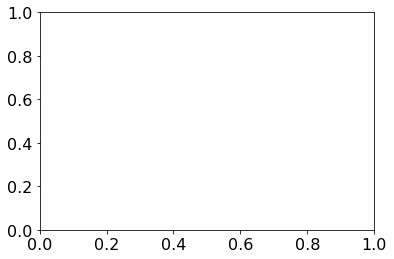

In [95]:
t = np.arange(0, integrationDuration, integrationDuration / nbOfSamples)
signal_1000 = bxscint_countArray[0]

d = {'t': t, 'signal_1000': signal_1000}
df = pd.DataFrame(data=d)


fig, ax = plt.subplots()
ax.plot(df.t, df.signal_1000)

In [54]:
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))

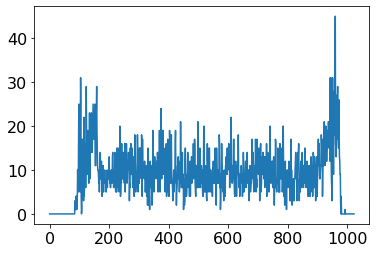

In [55]:
fig, ax = plt.subplots()
ax.plot(df.signal_1000)

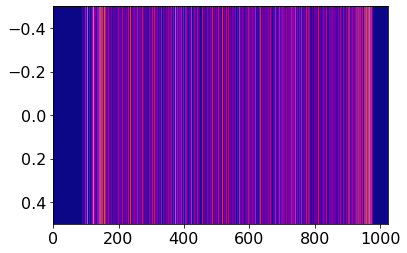

In [56]:
fig, ax = plt.subplots()
ax.imshow(heatmap, cmap="plasma", aspect='auto', interpolation="none")

In [57]:
signal_1000 = data[1]['BXSCINT_1000/Acquisition'][0]["countArray"]
heatmap = np.reshape(signal_1000, (1, len(signal_1000)))
for i in range(len(data[1]['BXSCINT_1000/Acquisition'])):
    signal_1000 = data[1]['BXSCINT_1000/Acquisition'][i]["countArray"]
    heatmap=np.vstack([signal_1000, heatmap])

Text(0.5, 1.0, '750 MeV/u')

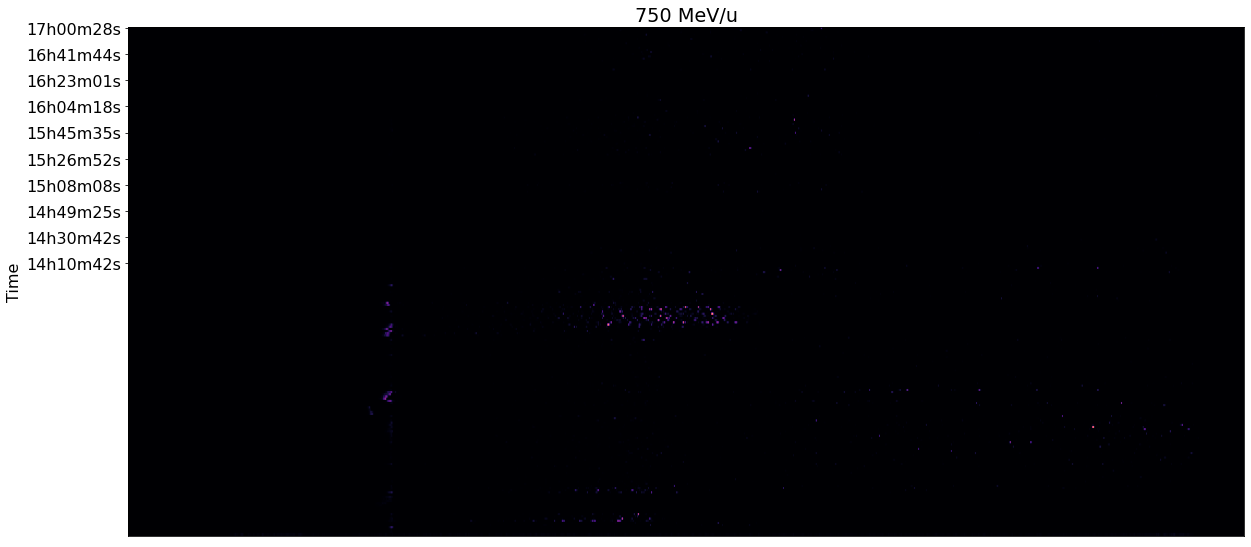

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(heatmap[:len(heatmap/2)], cmap="magma")

x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
step = np.shape(heatmap)[0]//20 + 1
ax.set_yticks(np.arange(0, np.shape(heatmap)[0]/2,  step))
try:
    ax.set_yticklabels(time_list[::-step]) # Reverse order
except:
    print("error on yticklabels")

ax.set_ylabel("Time")
ax.set_title("750 MeV/u")
# plt.savefig("bxscint_spill_history_750_MeV.png", facecolor='white', transparent=False, dpi = 300, bbox_inches='tight')